In [1]:
include("hmat.jl")

rel_error (generic function with 1 method)

In [2]:
using DelimitedFiles

In [58]:
b = readdlm("data/b2672.txt");
A = readdlm("data/A_MQ2672.txt");

In [59]:
x = A\b;

In [7]:
cs = uniform_cluster(size(A,1),64)
c = cluster_from_list(cs)
print(c)

2472
2048 424
1024 1024 256 168
512 512 512 512 128 128 128 40
256 256 256 256 256 256 256 256 64 64 64 64 64 64
128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64 64


In [43]:
H,_ = construct_hmat(A, c, 64, 20, 1e-4, -1)

(Hmat
  A: Array{Float64}((0, 0)) Array{Float64}(0,0)
  B: Array{Float64}((0, 0)) Array{Float64}(0,0)
  C: Array{Float64}((0, 0)) Array{Float64}(0,0)
  P: Array{Int64}((0,)) Int64[]
  is_rkmatrix: Bool false
  is_fullmatrix: Bool false
  is_hmat: Bool true
  m: Int64 2472
  n: Int64 2472
  children: Array{Hmat}((2, 2))
  s: Cluster
  t: Cluster
, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472])

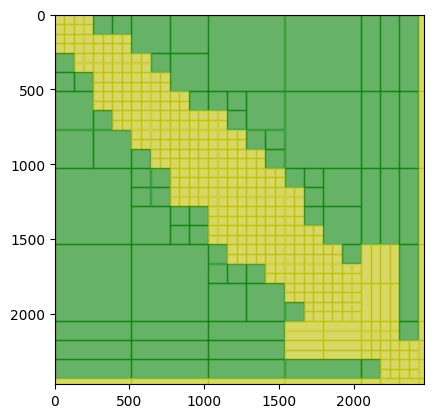

In [44]:
matshow(H)

In [45]:
verify_matrix_error(H, A)
verify_matvec_error(H, A)

Matrix Error = 0.04204040798053299
Matvec Error = 1.1702974419328551e-6


In [50]:
HH = copy(H)
lu!(HH, 1e-6)
verify_lu_error(H, HH, A)

[Operator] LU Error = 0.0016338157328839031
[Matrix  ] LU Error = 0.04204040798038733
[Operator] Solve Error = 0.08368563844394394
[Matrix  ] Solve Error = 6.870303311908367


In [62]:
include("tools.jl")
y1, err1 = pygmres_with_call_back(A, b, HH, true)
y2, err2 = pygmres_with_call_back(A, b, nothing, true)

Iteration 0, Error = 0.16819997402677625
Iteration 1, Error = 0.1561547513951717
Iteration 2, Error = 0.1526680338042619
Iteration 3, Error = 0.1526665708316984
Iteration 4, Error = 0.13131415491734355
Iteration 5, Error = 0.10634313870408346
Iteration 6, Error = 0.10634130492509909
Iteration 7, Error = 0.07132210090991147
Iteration 8, Error = 0.03249070488306892
Iteration 9, Error = 0.024454009308635772
Iteration 10, Error = 0.017883081954325065
Iteration 11, Error = 0.012442246915677713
Iteration 12, Error = 0.005988733461729989
Iteration 13, Error = 0.005962187236070847
Iteration 14, Error = 0.0049662324599554965
Iteration 15, Error = 0.0035541746448693773
Iteration 16, Error = 0.002024095594216829
Iteration 17, Error = 0.0013014954442207235
Iteration 18, Error = 0.0007953002795453222
Iteration 19, Error = 0.0003927955049171899
Iteration 20, Error = 0.0003922017166536109
Iteration 21, Error = 0.0003856775739136775
Iteration 22, Error = 0.0003769054203756734
Iteration 23, Error = 0.0

Iteration 160, Error = 0.0032678538459763404
Iteration 161, Error = 0.003266191931979134
Iteration 162, Error = 0.0032487012190690725
Iteration 163, Error = 0.0032401467555018154
Iteration 164, Error = 0.0032292138095740813
Iteration 165, Error = 0.003214330491171278
Iteration 166, Error = 0.0032050446154750145
Iteration 167, Error = 0.0031958524895716396
Iteration 168, Error = 0.0031890315503473295
Iteration 169, Error = 0.003185830288126609
Iteration 170, Error = 0.0031729448152230575
Iteration 171, Error = 0.0031643891858425446
Iteration 172, Error = 0.0031498967515456843
Iteration 173, Error = 0.0031242971537713896
Iteration 174, Error = 0.003092352566720084
Iteration 175, Error = 0.0030762312114328847
Iteration 176, Error = 0.00305311545701125
Iteration 177, Error = 0.003030744692262445
Iteration 178, Error = 0.0030099808233801555
Iteration 179, Error = 0.0029918884944081852
Iteration 180, Error = 0.0029859437804154007
Iteration 181, Error = 0.002982918312643251
Iteration 182, Err

Iteration 390, Error = 0.001319416822824755
Iteration 391, Error = 0.0013132285879952105
Iteration 392, Error = 0.0013078242726107395
Iteration 393, Error = 0.001305597716867553
Iteration 394, Error = 0.0013023615084772691
Iteration 395, Error = 0.0013001003608901036
Iteration 396, Error = 0.0012983834169717232
Iteration 397, Error = 0.0012973116199402495
Iteration 398, Error = 0.0012965618882198277
Iteration 399, Error = 0.0012959235064032462
Iteration 400, Error = 0.0012959200234017678
Iteration 401, Error = 0.0012957235003555588
Iteration 402, Error = 0.001295370324105631
Iteration 403, Error = 0.0012950427411485904
Iteration 404, Error = 0.0012947677358188128
Iteration 405, Error = 0.0012943384340890576
Iteration 406, Error = 0.0012937631361582182
Iteration 407, Error = 0.0012933170645211762
Iteration 408, Error = 0.0012924048987121696
Iteration 409, Error = 0.001290521773172735
Iteration 410, Error = 0.0012871272030479306
Iteration 411, Error = 0.0012837984119332747
Iteration 412,

Iteration 619, Error = 0.0007085311158412076
Iteration 620, Error = 0.0007084865206326873
Iteration 621, Error = 0.000707975100984259
Iteration 622, Error = 0.0007056037931495611
Iteration 623, Error = 0.0006987088271046731
Iteration 624, Error = 0.0006960453549888411
Iteration 625, Error = 0.0006919190293676587
Iteration 626, Error = 0.0006910411839362806
Iteration 627, Error = 0.0006905971786241797
Iteration 628, Error = 0.000689218723317687
Iteration 629, Error = 0.0006879290620403569
Iteration 630, Error = 0.0006872350829555237
Iteration 631, Error = 0.0006859106669270856
Iteration 632, Error = 0.0006846525763201956
Iteration 633, Error = 0.0006840700207856427
Iteration 634, Error = 0.000683361513945333
Iteration 635, Error = 0.0006826856629464612
Iteration 636, Error = 0.0006820200609834411
Iteration 637, Error = 0.0006815888772817568
Iteration 638, Error = 0.0006812793036277915
Iteration 639, Error = 0.0006811191614731596
Iteration 640, Error = 0.0006811182777762666
Iteration 641

Iteration 848, Error = 0.0005733985608791026
Iteration 849, Error = 0.000573062091527139
Iteration 850, Error = 0.00057261314653394
Iteration 851, Error = 0.0005723502745255557
Iteration 852, Error = 0.0005720374666159722
Iteration 853, Error = 0.0005718622958348738
Iteration 854, Error = 0.0005715911193449887
Iteration 855, Error = 0.000571180148563768
Iteration 856, Error = 0.000570374593857562
Iteration 857, Error = 0.00056920066626575
Iteration 858, Error = 0.0005670784636784187
Iteration 859, Error = 0.0005664501027361353
Iteration 860, Error = 0.0005664477375928585
Iteration 861, Error = 0.0005661311162004251
Iteration 862, Error = 0.0005658272570481579
Iteration 863, Error = 0.0005647620298396993
Iteration 864, Error = 0.0005636603194547965
Iteration 865, Error = 0.0005625983687895293
Iteration 866, Error = 0.0005621853039145041
Iteration 867, Error = 0.0005619874576702935
Iteration 868, Error = 0.0005615861867086135
Iteration 869, Error = 0.000561156293265371
Iteration 870, Err

([0.404533, -0.190491, 0.12664, -0.000959671, 0.0364003, 0.0364003, -0.000959665, 0.12664, -0.190491, 0.404533  …  0.416285, -0.206626, 0.149819, -0.0240416, 0.0459424, 0.0459424, -0.0240416, 0.149819, -0.206626, 0.416285], [0.842519, 0.0842237, 0.0658468, 0.0640373, 0.0504445, 0.0405085, 0.0390159, 0.0320298, 0.0302522, 0.0260336  …  0.000496031, 0.000495844, 0.000495592, 0.000495323, 0.000494936, 0.000494469, 0.00049429, 0.000494152, 0.000494058, 0.000493926])

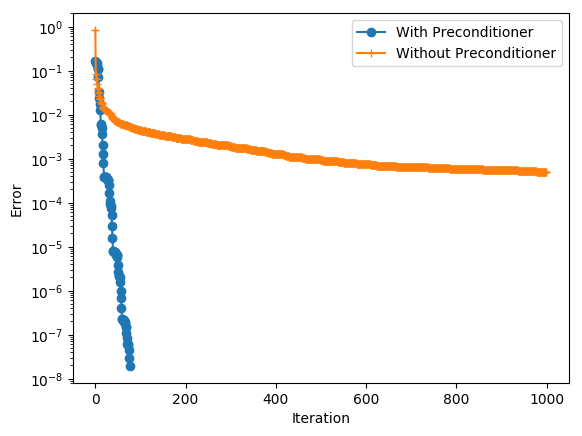

Error1 = 3.148247479973724e-7
Error2 = 0.6253240050413393


PyObject Text(24.000000000000007, 0.5, 'Error')

In [63]:
println("Error1 = ", rel_error(y1, x))
println("Error2 = ", rel_error(y2, x))
semilogy(err1,"o-",label="With Preconditioner")
semilogy(err2, "+-", label="Without Preconditioner")
legend()
xlabel("Iteration")
ylabel("Error")

## Try Larger Problems

In [56]:
b = readdlm("data/b.txt");
A = readdlm("data/A_MQ.txt");

Matrix Error = 0.04501990315897331
Matvec Error = 7.801008544539203e-7
[Operator] LU Error = 0.0076522883835963285
[Matrix  ] LU Error = 0.04507638761018384
[Operator] Solve Error = 8.900835009265296e-5
[Matrix  ] Solve Error = 0.001181654622818048
Iteration 0, Error = 2.2710878254422274e-6
Iteration 1, Error = 1.5042825625499843e-8
Iteration 2, Error = 9.087881600735061e-11
Iteration 3, Error = 7.502017111041571e-13
Iteration 0, Error = 0.8400636011789837
Iteration 1, Error = 0.07201494011949278
Iteration 2, Error = 0.0513534886198807
Iteration 3, Error = 0.04648904849322573
Iteration 4, Error = 0.03491812424870273
Iteration 5, Error = 0.0250737782438357
Iteration 6, Error = 0.018244221351117466
Iteration 7, Error = 0.01663817327878741
Iteration 8, Error = 0.014037815074873445
Iteration 9, Error = 0.012407705715184387
Iteration 10, Error = 0.01096589540688223
Iteration 11, Error = 0.008735863498229529
Iteration 12, Error = 0.00817884176402638
Iteration 13, Error = 0.00619274047858249


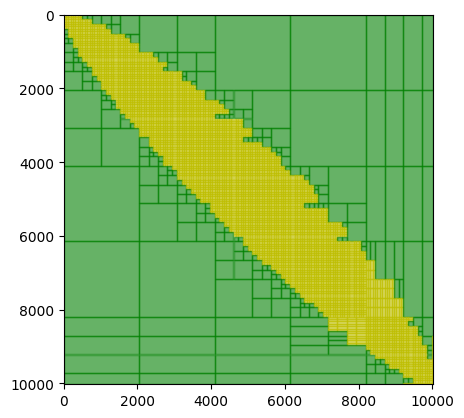

Iteration 224, Error = 1.4449420142740003e-8
Iteration 225, Error = 1.3572865671458697e-8
Iteration 226, Error = 1.3081271927639276e-8
Iteration 227, Error = 1.2365891264792594e-8
Iteration 228, Error = 1.1767218068655222e-8
Iteration 229, Error = 1.1474202270612259e-8
Iteration 230, Error = 1.0416506812696359e-8
Iteration 231, Error = 9.773161507953149e-9


([0.0091159, 0.0056537, 0.0056537, 0.0091159, 0.00957623, 0.00408293, 0.00322169, 0.00261325, 0.00185177, 0.00175518  …  0.00153112, 0.00197907, 0.00246059, 0.00345152, 0.00378917, 0.0100885, 0.00947196, 0.00557378, 0.00557378, 0.00947196], [0.840064, 0.0720149, 0.0513535, 0.046489, 0.0349181, 0.0250738, 0.0182442, 0.0166382, 0.0140378, 0.0124077  …  1.57163e-8, 1.48354e-8, 1.44494e-8, 1.35729e-8, 1.30813e-8, 1.23659e-8, 1.17672e-8, 1.14742e-8, 1.04165e-8, 9.77316e-9])

In [65]:
cs = uniform_cluster(size(A,1),64)
c = cluster_from_list(cs)
@time H,_ = construct_hmat(A, c, 64, 20, 1e-4, -1)
matshow(H)
verify_matrix_error(H, A)
verify_matvec_error(H, A)
HH = copy(H)
lu!(HH, 1e-6)
verify_lu_error(H, HH, A)
include("tools.jl")
y1, err1 = pygmres_with_call_back(A, b, HH, true)
y2, err2 = pygmres_with_call_back(A, b, nothing, true)

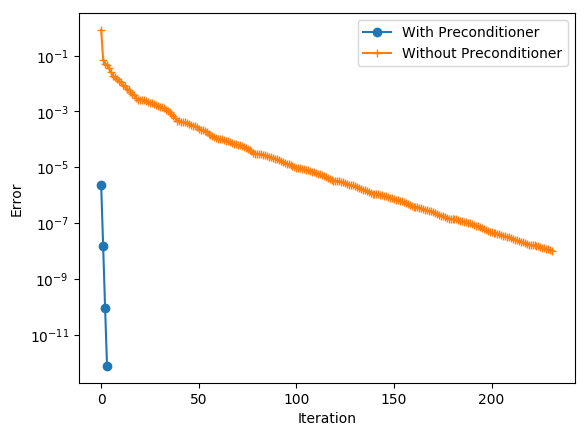

PyObject Text(24.000000000000007, 0.5, 'Error')

In [66]:
# println("Error1 = ", rel_error(y1, x))
# println("Error2 = ", rel_error(y2, x))
semilogy(err1,"o-",label="With Preconditioner")
semilogy(err2, "+-", label="Without Preconditioner")
legend()
xlabel("Iteration")
ylabel("Error")

In [67]:
writedlm("data/x.txt",y1)

In [69]:
norm(A*y1-b)/norm(b)

1.2314917265559903e-10